In [1]:
!pip install eep153_tools --upgrade

  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)


In [2]:
!pip install -r requirements.txt

  Using cached Pint-0.18-py2.py3-none-any.whl (209 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Attempting uninstall: pint
    Found existing installation: Pint 0.17
    Uninstalling Pint-0.17:
      Successfully uninstalled Pint-0.17


In [3]:
!git reset --hard origin/master

HEAD is now at 64bf06e Update diet_problem2.ipynb


In [4]:
#import fooddatacentral as fdc
user = "ligon"

# API key
apikey = "mAWBKrWZVhS4FwD7gC8HJ6RLQcVQieRiwSRFD9a9"

import pandas as pd
import numpy as np

from  scipy.optimize import linprog as lp
import numpy as np
import warnings
from eep153_tools.sheets import read_sheets

# Dietary Reference Intake - [A]

Our dietary reference intake function takes in a specified age and sex and returns the corresponding sex/age group that the inputs belong to. We use this output to index into the diet_minimum and diet_maximum dataframes in order to obtain the minimum or maximum quantity of each nutrient that a person in the age/sex group should be taking in. 

In [74]:
DRI_url = "https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/"

DRIs = read_sheets(DRI_url)

# Define *minimums*
diet_min = DRIs['diet_minimums'].set_index('Nutrition')

# Define *maximums*
diet_max = DRIs['diet_maximums'].set_index('Nutrition')

Key available for students@eep153.iam.gserviceaccount.com.


In [75]:
diet_min

,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,,
Energy,---,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,RDA,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",---,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",RDA,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",RDA,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",RDA,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",RDA,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",RDA,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,RDA,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [76]:
diet_max

,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,,
"Sodium, Na",UL,1500,1900,1900,2200,2200,2300,2300,2300,2300,2300,2300,2300,2300


In [77]:
diet_min = diet_min.drop(['Source'], axis=1)
diet_max = diet_max.drop(['Source'], axis=1)

In [9]:
def DRI(age, sex):
    label = ''
    if age > 50: 
        label = sex + ' 51+'
    elif age > 30: 
        label = sex + ' 31-50'
    elif age > 18: 
        label = sex + ' 19-30'
    elif age > 13: 
        label = sex + ' 14-18'
    elif age > 8:
        label = sex + ' 9-13'
    else:
        label = sex + ' 4-8'
    return label

In [10]:
DRI(12, 'F')

'F 9-13'

In [11]:
DRIs['diet_minimums'][DRI(20,'M')]

0     2400.0
1       56.0
2       33.6
3      400.0
4     1000.0
5      130.0
6        8.0
7      400.0
8       16.0
9      700.0
10    4700.0
11       1.3
12       1.2
13     900.0
14       2.4
15       1.3
16      90.0
17      15.0
18     120.0
19      11.0
Name: M 19-30, dtype: float64

In [12]:
DRIs['diet_minimums'][DRI(37,'F')]

0     1800.0
1       46.0
2       25.2
3      400.0
4     1000.0
5      130.0
6       18.0
7      320.0
8       14.0
9      700.0
10    4700.0
11       1.1
12       1.1
13     700.0
14       2.4
15       1.3
16      75.0
17      15.0
18      90.0
19       8.0
Name: F 31-50, dtype: float64

In [13]:
DRIs['diet_maximums'][DRI(37,'F')]

0    2300
Name: F 31-50, dtype: int64

# Mapping to Nutrients / Nutritional Content of Different Foods - [A]

Below, we imported the data from our spreadsheet and created a dataframe out of that data. This dataframe includes the food items, quantity of each food, unit, and the corresponding prices for CA and AK respectively. 

All of the prices were obtained from Ralph's in Irvine, California, and Fred Meyer in Anchorage, Alaska. We selected these stores because they are both owned by Kroger, and are essentially the same store in that they offer the same products for similar prices. 

Please also note that we are specifically looking at Irvine and Anchorage since they have similar population sizes.

In [14]:
food_prices_url = 'https://docs.google.com/spreadsheets/d/1virifSIh2lEqhLCCzSgC2Az0fQN3Lj0ImcxBUUf9-QU/edit?usp=sharing'

read_sheets_food_prices = read_sheets(food_prices_url)['Sheet 2']

read_sheets_food_prices = read_sheets_food_prices.replace({'Units':{'fluid ounce':'oz'}})

Key available for students@eep153.iam.gserviceaccount.com.


In [15]:
first_10 = read_sheets_food_prices.head(50)
first_10

,Item,Quantity,Units,Price CA,Price AK,FDC
0,Avocados,150.00,g,1.50,1.67,1102652
1,Roma Tomatoes,1.00,lb,0.99,1.99,1999634
2,Sweet Potatoes,3.00,lbs,3.99,4.99,1103233
3,Spinach,10.00,oz,2.99,2.99,1103136
4,Broccoli Crown,1.00,lb,1.49,2.79,1103170
5,Whole Carrots,2.00,lbs,1.99,2.99,1103193
6,Garlic,5.00,g,0.50,0.99,1103354
7,White Onions,1.00,lb,0.50,1.79,1103364
8,Sliced White Mushrooms,8.00,oz,2.39,3.29,169251
9,Zucchini,1.00,lb,1.75,2.29,169291


Here, we are mapping each food item from the dataframe we constructed to the nutrients in those food items.

In [78]:
import fooddatacentral as fdc

D = {}
count = 0
for food in  read_sheets_food_prices.Item.tolist():
    try:
        FDC = read_sheets_food_prices.loc[read_sheets_food_prices.Item==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D 

,Avocados,Roma Tomatoes,Sweet Potatoes,Spinach,Broccoli Crown,Whole Carrots,Garlic,White Onions,Sliced White Mushrooms,Zucchini,...,Lentils (kroger),Almonds (kroger),Brazil Nuts (Torn and Glasser),Chia Seeds,Flax Seeds (NOW foods real food),Peanut Butter,Mustard (kroger),Apple Cider Vinegar (kroger),Kimchi (simple truth),Mayonaise (kroger)
Alanine,0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.199,0.063,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
"Alcohol, ethyl",0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Amino acids,0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Arginine,0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.078,0.051,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Ash,0.00,0.31190,0.00,0.00,0.00,0.00,0.00,0.00,0.850,0.580,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamins and Other Components,0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
Water,73.23,94.73000,76.56,91.40,89.30,88.29,58.58,89.11,92.450,94.790,...,0.0,0.0,3.42,0.0,6.96,0.0,0.0,0.0,94.30,0.0
Zeaxanthin,0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
"Zinc, Zn",0.64,0.08245,0.19,0.53,0.41,0.24,1.16,0.17,0.520,0.320,...,0.0,0.0,4.06,0.0,4.34,0.0,0.0,0.0,0.22,0.0


In [17]:
D.head(20)

,Avocados,Roma Tomatoes,Sweet Potatoes,Spinach,Broccoli Crown,Whole Carrots,Garlic,White Onions,Sliced White Mushrooms,Zucchini,...,Lentils (kroger),Almonds (kroger),Brazil Nuts (Torn and Glasser),Chia Seeds,Flax Seeds (NOW foods real food),Peanut Butter,Mustard (kroger),Apple Cider Vinegar (kroger),Kimchi (simple truth),Mayonaise (kroger)
Alanine,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.199,0.063,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
"Alcohol, ethyl",0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Amino acids,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Arginine,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.078,0.051,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Ash,0.00,0.311900,0.00,0.00,0.00,0.00,0.00,0.00,0.850,0.580,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,1.7,0.0
Aspartic acid,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.195,0.147,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Beta-sitosterol,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Betaine,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,9.400,0.000,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Biotin,0.00,0.468800,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
Caffeine,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0


Below, we are showing examples of two different food items, salmon fillets and shrimp. For salmon fillets, we can see how all of the nutrients that are in salmon. For shrimp, we looked at how much cholesterol and protein is in it.

In [18]:
D['Salmon fillets (Fresh Atlantic Salmon Fillet (never frozen))'].head(20)

Alanine                         1.271
Alcohol, ethyl                  0.000
Amino acids                     0.000
Arginine                        1.221
Ash                             1.130
Aspartic acid                   2.025
Beta-sitosterol                 0.000
Betaine                         3.000
Biotin                          0.000
Caffeine                        0.000
Calcium, Ca                     9.000
Campesterol                     0.000
Carbohydrate, by difference     0.000
Carbohydrate, by summation      0.000
Carbohydrates                   0.000
Carotene, alpha                 0.000
Carotene, beta                  0.000
Carotene, gamma                 0.000
Cholesterol                    55.000
Choline, total                 78.500
Name: Salmon fillets (Fresh Atlantic Salmon Fillet (never frozen)), dtype: float64

In [19]:
D['shrimp (Extra Large EZ Peel Shrimp 21/25)']['Cholesterol']

161.0

In [20]:
D['shrimp (Extra Large EZ Peel Shrimp 21/25)']['Protein']

20.1

# Subsistence Problem - [A]

Here, we are calculating our solution. We are trying to find the minimum cost diet in Irvine and Anchorage and seeing how it changes with age and sex.

In [21]:
from  scipy.optimize import linprog as lp
import numpy as np
import warnings

def solve_subsistence_problem(FoodNutrients,Prices,diet_min,diet_max,max_weight=None,tol=1e-6):
    """Solve Stigler's Subsistence Cost Problem.

    Inputs:
       - FoodNutrients : A pd.DataFrame with rows corresponding to foods, columns to nutrients.
       - Prices : A pd.Series of prices for different foods
       - diet_min : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing minimum intakes.
       - diet_max : A pd.Series of DRIs, with index corresponding to columns of FoodNutrients,
                    describing maximum intakes.
       - max_weight : Maximum weight (in hectograms) allowed for diet.
       - tol : Solution values smaller than this in absolute value treated as zeros.
       
    """
    p = Prices.apply(lambda x:x.magnitude).dropna()

    # Compile list that we have both prices and nutritional info for; drop if either missing
    use = p.index.intersection(FoodNutrients.columns)
    p = p[use]

    # Drop nutritional information for foods we don't know the price of,
    # and replace missing nutrients with zeros.
    Aall = FoodNutrients[p.index].fillna(0)

    # Drop rows of A that we don't have constraints for.
    Amin = Aall.loc[Aall.index.intersection(diet_min.index)]

    Amax = Aall.loc[Aall.index.intersection(diet_max.index)]

    # Minimum requirements involve multiplying constraint by -1 to make <=.
    A = pd.concat([Amin,
                   -Amax])

    b = pd.concat([diet_min,
                   -diet_max]) # Note sign change for max constraints

    # Make sure order of p, A, b are consistent
    A = A.reindex(p.index,axis=1)
    A = A.reindex(b.index,axis=0)

    if max_weight is not None:
        # Add up weights of foods consumed
        A.loc['Hectograms'] = -1
        b.loc['Hectograms'] = -max_weight
        
    # Now solve problem!  (Note that the linear program solver we'll use assumes
    # "less-than-or-equal" constraints.  We can switch back and forth by
    # multiplying $A$ and $b$ by $-1$.)

    result = lp(p, -A, -b, method='interior-point')

    result.A = A
    result.b = b
    
    if result.success:
        result.diet = pd.Series(result.x,index=p.index)
    else: # No feasible solution?
        warnings.warn(result.message)
        result.diet = pd.Series(result.x,index=p.index)*np.nan  

    return result

In [22]:
# Convert food quantities to FDC units
read_sheets_food_prices['FDC Quantity'] = read_sheets_food_prices[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
read_sheets_food_prices['FDC Price CA'] = read_sheets_food_prices['Price CA']/read_sheets_food_prices['FDC Quantity']
read_sheets_food_prices['FDC Price AK'] = read_sheets_food_prices['Price AK']/read_sheets_food_prices['FDC Quantity']

read_sheets_food_prices.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices_CA = read_sheets_food_prices.groupby('Item',sort=False)['FDC Price CA'].min()
Prices_AK = read_sheets_food_prices.groupby('Item',sort=False)['FDC Price AK'].min()
Prices_CA = Prices_CA.dropna(how='any')
Prices_AK = Prices_AK.dropna(how='any')



/opt/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1990: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


In [34]:
group = DRI(20,'M')
tol = 1e-6

result_AK = solve_subsistence_problem(D,Prices_AK,diet_min[group],diet_max[group],tol=tol)
print(D, Prices_AK, diet_min[group], diet_max[group])

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result_AK.fun))

# Put back into nice series
diet_AK = result_AK.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet_AK[diet_AK >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab_AK = pd.DataFrame({"Outcome":np.abs(result_AK.A).dot(diet_AK),"Recommendation":np.abs(result_AK.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)
print()

print("\nConstraining nutrients are:")
excess_AK = tab_AK.diff(axis=1).iloc[:,1]
print(excess_AK.loc[np.abs(excess_AK) < tol*100].index.tolist())

                               Avocados  Roma Tomatoes  Sweet Potatoes   \
Alanine                            0.00        0.00000             0.00   
Alcohol, ethyl                     0.00        0.00000             0.00   
Amino acids                        0.00        0.00000             0.00   
Arginine                           0.00        0.00000             0.00   
Ash                                0.00        0.31190             0.00   
...                                 ...            ...              ...   
Vitamins and Other Components      0.00        0.00000             0.00   
Water                             73.23       94.73000            76.56   
Zeaxanthin                         0.00        0.00000             0.00   
Zinc, Zn                           0.64        0.08245             0.19   
cis-Lutein/Zeaxanthin              0.00        0.00000             0.00   

                               Spinach   Broccoli Crown  Whole Carrots   \
Alanine                 

In [35]:
print("Cost of diet for %s is $%4.2f per day." % (group,result_AK.fun))

Cost of diet for M 19-30 is $5.28 per day.


In [36]:
# Put back into nice series
diet_AK = pd.Series(result.x,index=Prices_AK.index)

print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet_AK[diet_AK >= tol])  # Drop items with quantities less than precision of calculation.


You'll be eating (in 100s of grams or milliliters):
Item
Spinach                             0.312773
Broccoli Crown                      0.175317
Whole Carrots                       0.685327
Nutritional Yeast                   0.010975
Salt (Morton Plain salt)            0.000004
Bananas                             6.809844
Almond milk (Silk unsweetened)      3.748720
Chickpeas (kroger)                  0.308477
Flax Seeds (NOW foods real food)    2.058149
Mayonaise (kroger)                  0.773624
dtype: float64


Here, we visualize the composition of the diet in Anchorage. 

<AxesSubplot:ylabel='None'>

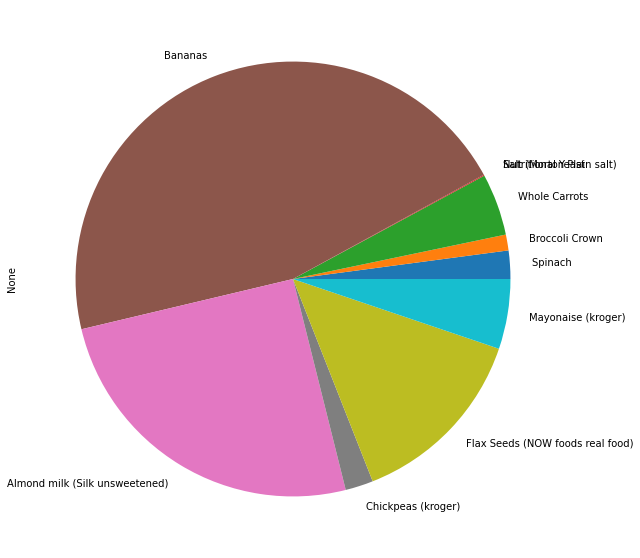

In [70]:
constrained_diet_AK = diet_AK[diet_AK >= tol] 
constrained_diet_AK.plot.pie(figsize=(10, 10))

In [37]:
group = DRI(20,'M')
tol = 1e-6

result_CA = solve_subsistence_problem(D,Prices_CA,diet_min[group],diet_max[group],tol=tol)
print(D, Prices_CA, diet_min[group], diet_max[group])

print("Cost of diet for %s is $%4.2f per day.\n" % (group,result_CA.fun))

# Put back into nice series
diet_CA = result_CA.diet

print("\nDiet (in 100s of grams or milliliters):")
print(diet_CA[diet_CA >= tol])  # Drop items with quantities less than precision of calculation.
print()

tab_CA = pd.DataFrame({"Outcome":np.abs(result_CA.A).dot(diet_CA),"Recommendation":np.abs(result_CA.b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab_CA)
print()

print("\nConstraining nutrients are:")
excess_CA = tab_CA.diff(axis=1).iloc[:,1]
print(excess_CA.loc[np.abs(excess_CA) < tol*100].index.tolist())

                               Avocados  Roma Tomatoes  Sweet Potatoes   \
Alanine                            0.00        0.00000             0.00   
Alcohol, ethyl                     0.00        0.00000             0.00   
Amino acids                        0.00        0.00000             0.00   
Arginine                           0.00        0.00000             0.00   
Ash                                0.00        0.31190             0.00   
...                                 ...            ...              ...   
Vitamins and Other Components      0.00        0.00000             0.00   
Water                             73.23       94.73000            76.56   
Zeaxanthin                         0.00        0.00000             0.00   
Zinc, Zn                           0.64        0.08245             0.19   
cis-Lutein/Zeaxanthin              0.00        0.00000             0.00   

                               Spinach   Broccoli Crown  Whole Carrots   \
Alanine                 

In [38]:
# Put back into nice series
diet_CA = pd.Series(result.x,index=Prices_CA.index)

print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet_CA[diet_CA >= tol])  # Drop items with quantities less than precision of calculation.


You'll be eating (in 100s of grams or milliliters):
Item
Spinach                             0.312773
Broccoli Crown                      0.175317
Whole Carrots                       0.685327
Nutritional Yeast                   0.010975
Salt (Morton Plain salt)            0.000004
Bananas                             6.809844
Almond milk (Silk unsweetened)      3.748720
Chickpeas (kroger)                  0.308477
Flax Seeds (NOW foods real food)    2.058149
Mayonaise (kroger)                  0.773624
dtype: float64


Here, we visualize the composition of the diet in Irvine. 

<AxesSubplot:ylabel='None'>

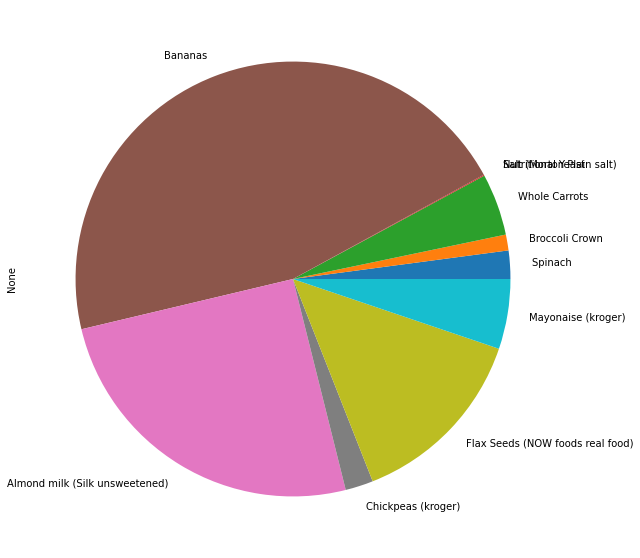

In [71]:
constrained_diet_CA = diet_CA[diet_CA >= tol] 
constrained_diet_CA.plot.pie(figsize=(10, 10))

Here, we are constructing a dataframe to compare the cost per day for each age/sex group by location.

In [64]:
ages = [4, 9, 14, 19, 31, 51]
cost_per_day_M_AK = []
cost_per_day_F_AK = []
cost_per_day_M_CA = []
cost_per_day_F_CA = []
for age in ages: 
    group_M = DRI(age, 'M')
    group_F = DRI(age, 'F')
    result_AK_M = solve_subsistence_problem(D,Prices_AK,diet_min[group_M],diet_max[group_M],tol=tol)
    result_AK_F = solve_subsistence_problem(D,Prices_AK,diet_min[group_F],diet_max[group_F],tol=tol)
    result_CA_M = solve_subsistence_problem(D,Prices_CA,diet_min[group_M],diet_max[group_M],tol=tol)
    result_CA_F = solve_subsistence_problem(D,Prices_CA,diet_min[group_F],diet_max[group_F],tol=tol)
    cost_per_day_M_AK.append((group_M,result_AK_M.fun))
    cost_per_day_F_AK.append((group_F,result_AK_F.fun))
    cost_per_day_M_CA.append((group_M,result_CA_M.fun))
    cost_per_day_F_CA.append((group_F,result_CA_F.fun))

In [65]:
cost_per_day_M_AK, cost_per_day_F_AK, cost_per_day_M_CA, cost_per_day_F_CA 

([('M 4-8', 3.4199702711394666),
  ('M 9-13', 4.381487240380212),
  ('M 14-18', 5.12164208024859),
  ('M 19-30', 5.282976146693817),
  ('M 31-50', 5.168031667591678),
  ('M 51+', 5.0530851059449615)],
 [('F 4-8', 3.357491482789585),
  ('F 9-13', 4.266542240267038),
  ('F 14-18', 4.8318766085495275),
  ('F 19-30', 4.8664696708999395),
  ('F 31-50', 4.758413336032541),
  ('F 51+', 4.626526973111803)],
 [('M 4-8', 2.705233873653077),
  ('M 9-13', 3.7080096363655324),
  ('M 14-18', 4.505236136564592),
  ('M 19-30', 4.615969814246691),
  ('M 31-50', 4.517492520741325),
  ('M 51+', 4.419018173812601)],
 [('F 4-8', 2.6665435313083328),
  ('F 9-13', 3.6215964678224255),
  ('F 14-18', 4.117377114422913),
  ('F 19-30', 4.156084661895371),
  ('F 31-50', 4.066436830834816),
  ('F 51+', 3.9032587402615695)])

In [66]:
cost_per_day_AK = pd.DataFrame(cost_per_day_M_AK + cost_per_day_F_AK, columns=['group', 'cost per day'])
cost_per_day_AK

,group,cost per day
0,M 4-8,3.419970
1,M 9-13,4.381487
2,M 14-18,5.121642
3,M 19-30,5.282976
4,M 31-50,5.168032
5,M 51+,5.053085
6,F 4-8,3.357491
7,F 9-13,4.266542
8,F 14-18,4.831877
9,F 19-30,4.866470


In [67]:
cost_per_day_CA = pd.DataFrame(cost_per_day_M_CA + cost_per_day_F_CA, columns=['group', 'cost per day'])
cost_per_day_CA

,group,cost per day
0,M 4-8,2.705234
1,M 9-13,3.708010
2,M 14-18,4.505236
3,M 19-30,4.615970
4,M 31-50,4.517493
5,M 51+,4.419018
6,F 4-8,2.666544
7,F 9-13,3.621596
8,F 14-18,4.117377
9,F 19-30,4.156085


# Sensitivity of Solution - [C]

Here, we are looking at the change in log cost per day as it relates to the change in price in Anchorage, Alaska for each food item. Based on our plot,  we can see that flax seeds, bananas, and almond milk exhibit the greatest changes in cost as the price increases for each of these items respectively. 

In [46]:
import cufflinks as cf
cf.go_offline()

scale = [.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5]

cost0_AK = solve_subsistence_problem(D,Prices_AK,diet_min[group],diet_max[group],tol=tol).fun

Prices_AK_response={}
for s in scale:
    cost = {}
    for i,p in enumerate(Prices_AK):
        my_p_AK = Prices_AK.copy()
        my_p_AK[i] = p*s
        result_AK = solve_subsistence_problem(D,my_p_AK,diet_min[group],diet_max[group],tol=tol)
        cost[Prices_AK.index[i]] = np.log(result_AK.fun/cost0_AK)
    Prices_AK_response[np.log(s)] = cost

Prices_AK_response = pd.DataFrame(Prices_AK_response).T
Prices_AK_response.iplot(xTitle='change in log price',yTitle='change in log cost')

We selected flax seeds, whose cost changed the most with price above, as our reference good. This plot shows how the composition of the other food items changes with respect to the price of flax seeds.

In [48]:
import cufflinks as cf
cf.go_offline()

ReferenceGood = 'Flax Seeds (NOW foods real food)'

scale = [0.5,0.75,0.9,1.,1.1,1.2,1.3,1.4,1.5,2,4]

cost0_AK = solve_subsistence_problem(D,Prices_AK,diet_min[group],diet_max[group],tol=tol).fun

my_p_AK = Prices_AK.copy()

diet = {}
for s in scale:

    my_p_AK[ReferenceGood] = Prices_AK[ReferenceGood]*s
    result_AK = solve_subsistence_problem(D,my_p_AK,diet_min[group],diet_max[group],tol=tol)
    diet[my_p_AK[ReferenceGood]] = result_AK.diet

Diet_response = pd.DataFrame(diet).T
Diet_response.index.name = '%s Price' % ReferenceGood

Diet_response.reset_index(inplace=True)

# Get rid of units for index (cufflinks chokes)
Diet_response['%s Price' % ReferenceGood] = Diet_response['%s Price' % ReferenceGood].apply(lambda x: x.magnitude)

Diet_response = Diet_response.set_index('%s Price' % ReferenceGood)

# Just look at goods consumed in quantities greater than error tolerance
Diet_response.loc[:,(Diet_response>tol).sum()>0].iplot(xTitle='%s Price' % ReferenceGood,yTitle='Hectograms')

/opt/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1990: UnitStrippedWarning:

The unit of the quantity is stripped when downcasting to ndarray.



This plot shows how the composition of nutrients in each of the other food items changes with respect to the price of flax seeds.

In [49]:
# Matrix product maps quantities of food into quantities of nutrients
NutrientResponse = Diet_response@D.T

# Drop columns of missing nutrients
NutrientResponse = NutrientResponse.loc[:,NutrientResponse.count()>0]
NutrientResponse.iplot(xTitle='%s Price' % ReferenceGood,yTitle='Hectograms')

This plot shows how the composition of the other food items changes with respect to the price of flax seeds. However, this plot includes the constraint that the total weight of the diet must be less that 12 hectograms (1.2 kg).

In [50]:
import cufflinks as cf
cf.go_offline()

ReferenceGood = 'Flax Seeds (NOW foods real food)'

scale = [0.5,0.75,0.9,1.,1.1,1.2,1.3,1.4,1.5,2,4]

cost0_AK = solve_subsistence_problem(D,Prices_AK,
                                  diet_min[group],diet_max[group],max_weight=10,tol=tol).fun

my_p_AK = Prices_AK.copy()

diet = {}
for s in scale:

    my_p_AK[ReferenceGood] = Prices_AK[ReferenceGood]*s
    result_AK = solve_subsistence_problem(D,my_p_AK,
                                       diet_min[group],diet_max[group],max_weight=10,tol=tol)
    diet[my_p_AK[ReferenceGood]] = result_AK.diet

Diet_response = pd.DataFrame(diet).T
Diet_response.index.name = '%s Price' % ReferenceGood

Diet_response.reset_index(inplace=True)

# Get rid of units for index (cufflinks chokes)
Diet_response['%s Price' % ReferenceGood] = Diet_response['%s Price' % ReferenceGood].apply(lambda x: x.magnitude)

Diet_response = Diet_response.set_index('%s Price' % ReferenceGood)

# Just look at goods consumed in quantities greater than error tolerance
Diet_response.loc[:,(Diet_response>tol).sum()>0].iplot(xTitle='%s Price' % ReferenceGood,yTitle='Hectograms')